### 1. Consider any dataset. You can create own or use any publicly available dataset. Pretend the goal is to predict the target variable.

<p>(a) Run ridge regression (RR) on the data.</p>

<pre>
i.  Find the λ value that minimizes the cross validated error/training error

ii. Provide plots for both the cross validated error/training error and the coefficients as functions of λ.
</pre>

<p>(b) Run lasso on the data.</p>

<pre>
i.  Find the λ value that minimizes the cross validated error/training error.

ii. Provide plots for both the cross validated error/training error and the coefficients as functions of λ.
</pre>

<p>(c) Examine the model coefficients for the chosen λ. You can use either pair plot or bar diagram to visualize the model coefficients.</p>

### Importing Libraries

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### Used dataset description

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# shape of dataset

print(boston.data.shape)

(506, 13)


In [4]:
# column in dataset

print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
import pandas as pd
bos = pd.DataFrame(boston.data)
bos['PRICE'] = boston.target
print(bos.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  PRICE  
0  396.90  4.98   24.0  
1  396.90  9.14   21.6  
2  392.83  4.03   34.7  
3  394.63  2.94   33.4  
4  396.90  5.33   36.2  


### Segregating variables: Independent and Dependent Variables

In [6]:
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

### Splitting the data into train set, cross validation set and the test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=48, shuffle=True)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, random_state=58, shuffle=True)

In [8]:
print("train data:      ", X_train.shape, y_train.shape)
print("validation data: ", X_cv.shape, y_cv.shape)
print("test data:       ", X_test.shape, y_test.shape)

train data:       (288, 13) (288,)
validation data:  (142, 13) (142,)
test data:        (76, 13) (76,)


### 1.(a) implementing Ridge regression

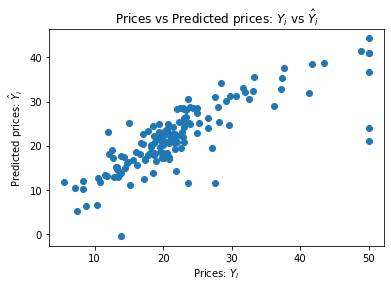

R^2 score:  0.6660539572095094


In [9]:
r = Ridge()  # using default parameter of Ridge, here alpha = 1
r.fit(X_train, y_train)

Y_pred_cv = r.predict(X_cv)  # predict with cross validation data

plt.scatter(y_cv, Y_pred_cv)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
#plt.plot(y_test, Y_pred, color='red')
plt.show()
print("R^2 score: ",r2_score(y_cv, Y_pred_cv))

### Hyperparameter tuning for Ridge regression (λ)

100%|██████████| 14/14 [00:00<00:00, 96.75it/s]


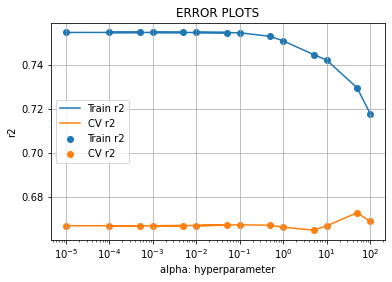

In [10]:
train_r2 = []
cv_r2 = []
alpha = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
for i in tqdm(alpha):
    rg=Ridge(alpha=i)
    rg.fit(X_train, y_train)
    
    y_train_pred = rg.predict(X_train)
    #print(len(y_train_pred))
    y_cv_pred = rg.predict(X_cv)
    #print(len(y_cv_pred))
   
    train_r2.append(r2_score(y_train,y_train_pred))
    cv_r2.append(r2_score(y_cv, y_cv_pred))



plt.semilogx(alpha, train_r2, label='Train r2')
plt.semilogx(alpha, cv_r2, label='CV r2')

plt.scatter(alpha, train_r2, label='Train r2')
plt.scatter(alpha, cv_r2, label='CV r2')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("r2")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Identify best λ for Ridge regression

In [11]:
r2 = list(cv_r2)
max_r2 = max(r2)
max_r2_index = r2.index(max_r2)


best_alpha_ridge = alpha[max_r2_index]
print("best alpha as hyperparameter of Ridge regression = ",best_alpha_ridge)
best_r2_score_ridge = r2[max_r2_index]
print("best r2 score = ",best_r2_score_ridge)

best alpha as hyperparameter of Ridge regression =  50
best r2 score =  0.6726236444106717


### Check the R^2 value on test data with best hyperparameter (λ)

In [12]:
print("best alpha", best_alpha_ridge)

best alpha 50


In [13]:
ridge = Ridge(alpha=best_alpha_ridge)  # using default parameter of Ridge, here alpha = best_alpha
ridge.fit(X_train, y_train)

Y_pred = ridge.predict(X_test)

plt.show()
print("R^2= ",r2_score(y_test, Y_pred))

R^2=  0.7584312450932488


In [14]:
ridge.coef_

array([-0.10372747,  0.06176824, -0.05144967,  0.4683435 , -0.3192696 ,
        2.76474341,  0.00636939, -1.04465364,  0.27458077, -0.01558546,
       -0.5967446 ,  0.00823079, -0.63408662])

### 1.(b) implementing Lasso regression

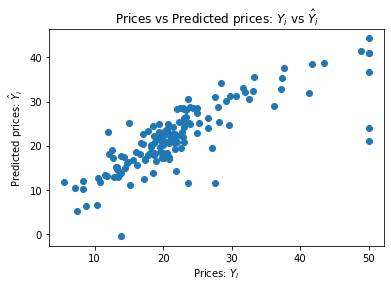

R^2 score:  0.6660539572095094


In [15]:
l = Lasso()  # using default parameter of Ridge, here alpha = 1
l.fit(X_train, y_train)

Y_pred_cv = r.predict(X_cv)  # predict with cross validation data

plt.scatter(y_cv, Y_pred_cv)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
#plt.plot(y_test, Y_pred, color='red')
plt.show()
print("R^2 score: ",r2_score(y_cv, Y_pred_cv))

### Hyperparameter tuning for Lasso regression (λ)

100%|██████████| 14/14 [00:00<00:00, 289.94it/s]


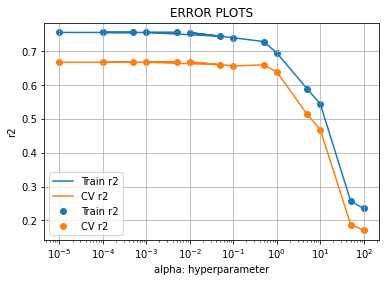

In [16]:
train_r2 = []
cv_r2 = []
alpha = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
for i in tqdm(alpha):
    lg=Lasso(alpha=i)
    lg.fit(X_train, y_train)
    
    y_train_pred = lg.predict(X_train)
    #print(len(y_train_pred))
    y_cv_pred = lg.predict(X_cv)
    #print(len(y_cv_pred))
   
    train_r2.append(r2_score(y_train,y_train_pred))
    cv_r2.append(r2_score(y_cv, y_cv_pred))



plt.semilogx(alpha, train_r2, label='Train r2')
plt.semilogx(alpha, cv_r2, label='CV r2')

plt.scatter(alpha, train_r2, label='Train r2')
plt.scatter(alpha, cv_r2, label='CV r2')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("r2")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Identify best λ for Lasso regression

In [17]:
r2 = list(cv_r2)
max_r2 = max(r2)
max_r2_index = r2.index(max_r2)


best_alpha_lasso = alpha[max_r2_index]
print("best alpha as hyperparameter of Ridge regression = ",best_alpha_lasso)
best_r2_score_lasso = r2[max_r2_index]
print("best r2 score = ",best_r2_score_lasso)

best alpha as hyperparameter of Ridge regression =  0.01
best r2 score =  0.6674958142117355


### Check the R^2 value on test data with best hyperparameter (λ)

In [18]:
print("best alpha", best_alpha_lasso)

best alpha 0.01


In [19]:
lasso = Ridge(alpha=best_alpha_lasso)  # using default parameter of Ridge, here alpha = best_alpha
lasso.fit(X_train, y_train)

Y_pred = lasso.predict(X_test)

plt.show()
print("R^2= ",r2_score(y_test, Y_pred))

R^2=  0.7958188120267065


In [20]:
lasso.coef_

array([-1.06754199e-01,  5.38966500e-02,  3.88746793e-02,  2.51363634e+00,
       -1.89343174e+01,  4.51385045e+00,  2.74891023e-03, -1.38809267e+00,
        2.58891691e-01, -1.36549433e-02, -7.41647535e-01,  7.55759670e-03,
       -4.41734634e-01])

### 1.(c) Examine the model coefficients for the chosen λ.

### Plotting the coefficients for Ridge regression considering best hyperparameter

Text(0.5, 1.0, 'Coefficient plot')

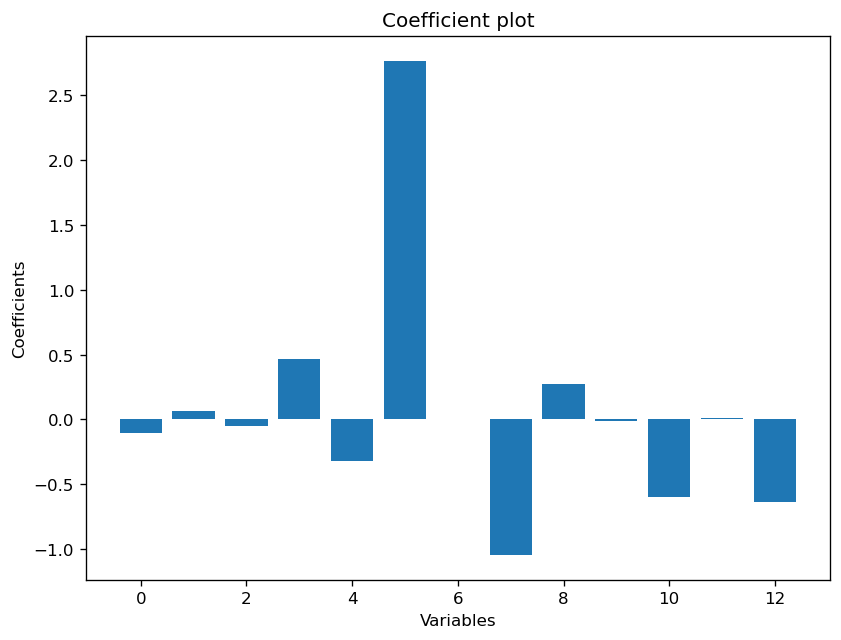

In [21]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
y = ridge.coef_
plt.bar( x, y ) 
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

### Plotting the coefficients for Lasso regression considering best hyperparameter

Text(0.5, 1.0, 'Coefficient plot')

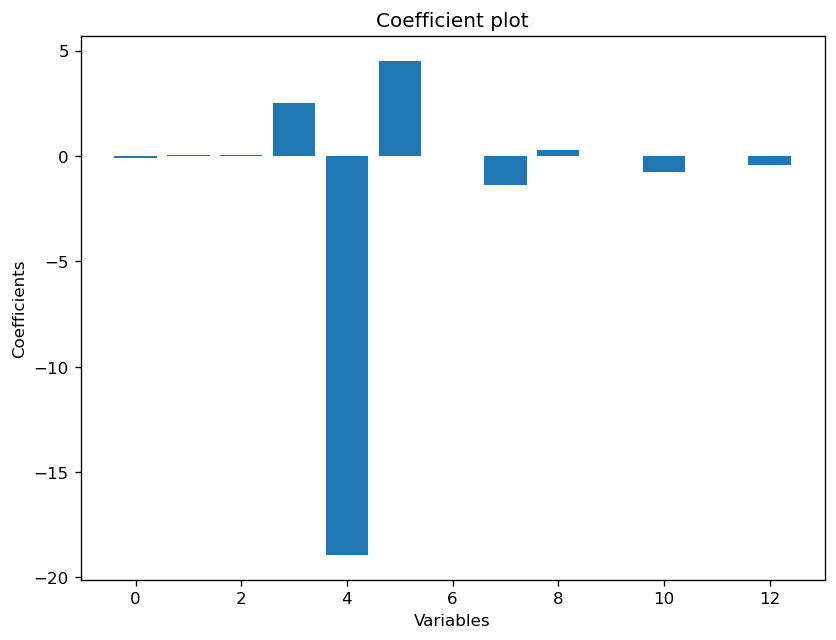

In [22]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
y = lasso.coef_
plt.bar( x, y ) 
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')